In [1]:
from src.dataset import CIFARDataset, iid_dataloader, non_iid_dataloader, filter_dataset_by_class
from src.prepare import prepare
from src.lenet import LeNet, weights_init
from src.train_experiment import federated_learning_experiment, train_client, prepare_tensor_for_plotting
from src.utils import plot_class_distribution
from torchvision import datasets, transforms
from torch.autograd import grad
import os
import numpy as np
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

import random

In [2]:
#Setting random seeds
random.seed(41)
np.random.seed(41)
torch.manual_seed(41)

### Baseline: Train LeNet on CIFAR-5 and perform iDLG after the first local epoch

In [3]:
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
dummy_data_baseline, gt_data_orig_baseline, history_baseline, ssim_vals_baseline, psnr_vals_baseline, mse_vals_baseline = federated_learning_experiment(
                                        global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=False,
                                        alpha = None,
                                        train_dataloader=train_loader
                                        )

Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1


### Experiment:  Train LeNet on CIFAR-5 with gradient pruning for various alpha values and perform iDLG after the first local epoch

In [4]:
iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare() 
dummy_data_0_0_0, gt_data_orig_0_0_0, history_0_0_0, ssim_vals_0_0_0, psnr_vals_0_0_0, mse_vals_0_0_0 = federated_learning_experiment(global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=True,
                                        alpha = 0.0,
                                        train_dataloader=train_loader
                                        )

iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
dummy_data_0_0_5, gt_data_orig_0_0_5, history_0_0_5, ssim_vals_0_0_5, psnr_vals_0_0_5, mse_vals_0_0_5 = federated_learning_experiment(global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=True,
                                        alpha = 0.05,
                                        train_dataloader=train_loader
                                        )

iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
dummy_data_0_1_0, gt_data_orig_0_1_0, history_0_1_0, ssim_vals_0_1_0, psnr_vals_0_1_0, mse_vals_0_1_0 = federated_learning_experiment(global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=True,
                                        alpha = 0.10,
                                        train_dataloader=train_loader
                                        )

iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
dummy_data_0_1_5, gt_data_orig_0_1_5, history_0_1_5, ssim_vals_0_1_5, psnr_vals_0_1_5, mse_vals_0_1_5 = federated_learning_experiment(global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=True,
                                        alpha = 0.15,
                                        train_dataloader=train_loader
                                        )

iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
dummy_data_0_2_0, gt_data_orig_0_2_0, history_0_2_0, ssim_vals_0_2_0, psnr_vals_0_2_0, mse_vals_0_2_0 = federated_learning_experiment(global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=True,
                                        alpha = 0.20,
                                        train_dataloader=train_loader
                                        )

iid_client_train_loader, device, criterion, validation_loader, train_loader, clients_dataset, global_model = prepare()
dummy_data_0_2_5, gt_data_orig_0_2_5, history_0_2_5, ssim_vals_0_2_5, psnr_vals_0_2_5, mse_vals_0_2_5 = federated_learning_experiment(global_model, 
                                        num_clients_per_round=1,
                                        num_local_epochs=1, 
                                        lr = 5e-3, 
                                        client_train_loader=iid_client_train_loader, 
                                        max_rounds=1, 
                                        device=device, 
                                        criterion=criterion,
                                        test_dataloader=validation_loader, 
                                        filtered_train_dataset=clients_dataset,
                                        prune=True,
                                        alpha = 0.25,
                                        train_dataloader=train_loader
                                        )


Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1
Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1
Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1
Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1
Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1
Files already downloaded and verified
Files already downloaded and verified
round 0, starting client 1/1, id: 1


In [6]:
transposed = list(zip(*psnr_vals_baseline))
psnr_vals_baseline = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*psnr_vals_0_0_0))
psnr_vals_0_0_0 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*psnr_vals_0_0_5))
psnr_vals_0_0_5 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*psnr_vals_0_1_0))
psnr_vals_0_1_0 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*psnr_vals_0_1_5))
psnr_vals_0_1_5 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*psnr_vals_0_2_0))
psnr_vals_0_2_0 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*psnr_vals_0_2_5))
psnr_vals_0_2_5 = [sum(values) / len(values) for values in transposed]

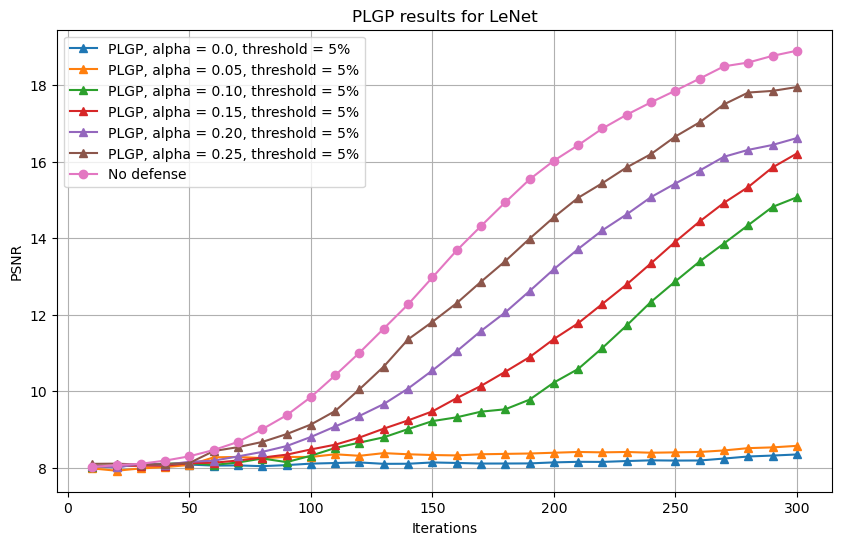

In [160]:
iterations = np.arange(10, 310, 10)

plt.figure(figsize=(10, 6))

# Plotting for each specified value
plt.plot(iterations, psnr_vals_0_0_0, '^-', label='PLGP, alpha = 0.0, threshold = 5%')
plt.plot(iterations, psnr_vals_0_0_5, '^-', label='PLGP, alpha = 0.05, threshold = 5%')
plt.plot(iterations, psnr_vals_0_1_0, '^-', label='PLGP, alpha = 0.10, threshold = 5%')
plt.plot(iterations, psnr_vals_0_1_5, '^-', label='PLGP, alpha = 0.15, threshold = 5%')
plt.plot(iterations, psnr_vals_0_2_0, '^-', label='PLGP, alpha = 0.20, threshold = 5%')
plt.plot(iterations, psnr_vals_0_2_5, '^-', label='PLGP, alpha = 0.25, threshold = 5%')

# Assuming psnr_vals_baseline is still to be plotted
plt.plot(iterations, psnr_vals_baseline, 'o-', label = 'No defense')

# Setting the labels, legend, and grid
plt.xlabel('Iterations')
plt.ylabel('PSNR')
plt.title('PLGP results for LeNet')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
transposed = list(zip(*ssim_vals_baseline))
ssim_vals_baseline = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*ssim_vals_0_0_0))
ssim_vals_0_0_0 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*ssim_vals_0_0_5))
ssim_vals_0_0_5 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*ssim_vals_0_1_0))
ssim_vals_0_1_0 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*ssim_vals_0_1_5))
ssim_vals_0_1_5 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*ssim_vals_0_2_0))
ssim_vals_0_2_0 = [sum(values) / len(values) for values in transposed]

transposed = list(zip(*ssim_vals_0_2_5))
ssim_vals_0_2_5 = [sum(values) / len(values) for values in transposed]

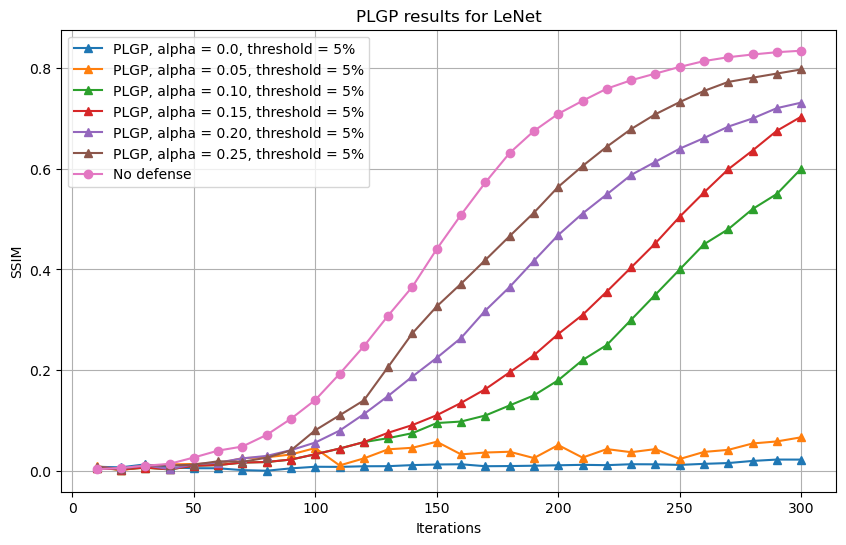

In [404]:
iterations = np.arange(10, 310, 10)

plt.figure(figsize=(10, 6))

# Plotting for each specified value
plt.plot(iterations, ssim_vals_0_0_0, '^-', label='PLGP, alpha = 0.0, threshold = 5%')
plt.plot(iterations, ssim_vals_0_0_5, '^-', label='PLGP, alpha = 0.05, threshold = 5%')
plt.plot(iterations, ssim_vals_0_1_0, '^-', label='PLGP, alpha = 0.10, threshold = 5%')
plt.plot(iterations, ssim_vals_0_1_5, '^-', label='PLGP, alpha = 0.15, threshold = 5%')
plt.plot(iterations, ssim_vals_0_2_0, '^-', label='PLGP, alpha = 0.20, threshold = 5%')
plt.plot(iterations, ssim_vals_0_2_5, '^-', label='PLGP, alpha = 0.25, threshold = 5%')

plt.plot(iterations, ssim_vals_baseline, 'o-', label = 'No defense')

plt.xlabel('Iterations')
plt.ylabel('SSIM')
plt.title('PLGP results for LeNet')
plt.legend()
plt.grid(True)
plt.show()